# ЗАДАНИЕ 5. ПОСТРОЕНИЕ ТРЕНД-СЕЗОННЫХ МОДЕЛЕЙ

In [1]:
import os
import pandas as pd 
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import linregress
from math import sqrt
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson
from pandas.plotting import autocorrelation_plot
import scipy.stats
import seaborn as sns
from scipy.stats import t as student
from pandas import Grouper
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
os.chdir("C:/Users/HP/Documents/analysis/TS/data/")

In [3]:
data = pd.read_excel('data.xls', sheet_name='Material 2')
data.head()

,Unnamed: 0,Unnamed: 1,Рыночные цены на материал 2 (руб.),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,NaN,NaN,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,...,2010-03-01 00:00:00,2010-04-01 00:00:00,2010-05-01 00:00:00,2010-06-01 00:00:00,2010-07-01 00:00:00,2010-08-01 00:00:00,2010-09-01 00:00:00,2010-10-01 00:00:00,2010-11-01 00:00:00,2010-12-01 00:00:00
1,№ организации,1.0,4.22,3.99,4.05,4.34,4.63,4.76,5.09,5.13,...,3.81,4.03,4.13,4.4,4.66,4.79,4.57,4.4,4.26,3.82
2,NaN,2.0,4,4.14,4.43,4.79,5.1,5.17,5.12,4.89,...,4.87,5.19,5.29,5.46,5.45,5.15,4.94,4.6,4.41,4.35
3,NaN,3.0,3.9,3.74,3.9,4.13,4.31,4.66,4.76,4.85,...,4.23,4.48,4.71,5.05,5.21,5.21,5.19,5.08,4.77,4.53
4,NaN,4.0,3.64,3.94,4.09,4.73,5,5.46,5.46,5.41,...,4.23,4.55,5.1,5.41,5.62,5.36,5.05,4.54,4.24,3.83


In [4]:
dates = data.loc[data.index == 0].values[0, 2:]
val = data.loc[data.index == 1].values[0, 2:]

In [5]:
data={"Date": dates, "Value": val}

In [6]:
my_data = pd.DataFrame(data)
my_data.head()

,Date,Value
0,2007-01-01,4.22
1,2007-02-01,3.99
2,2007-03-01,4.05
3,2007-04-01,4.34
4,2007-05-01,4.63


In [7]:
my_data=my_data.set_index('Date')
my_data.head()

,Value
Date,
2007-01-01,4.22
2007-02-01,3.99
2007-03-01,4.05
2007-04-01,4.34
2007-05-01,4.63


In [8]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2007-01-01 to 2010-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Value   48 non-null     object
dtypes: object(1)
memory usage: 768.0+ bytes


In [9]:
my_data.Value=my_data.Value.astype(float)

In [10]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2007-01-01 to 2010-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [11]:
series=my_data.squeeze()
type(series)

pandas.core.series.Series

In [12]:
y = series.values

In [13]:
t = np.arange(1, len(y) + 1)
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

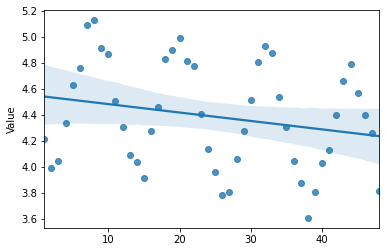

In [14]:
sns.regplot(x=t, y="Value", data=my_data);

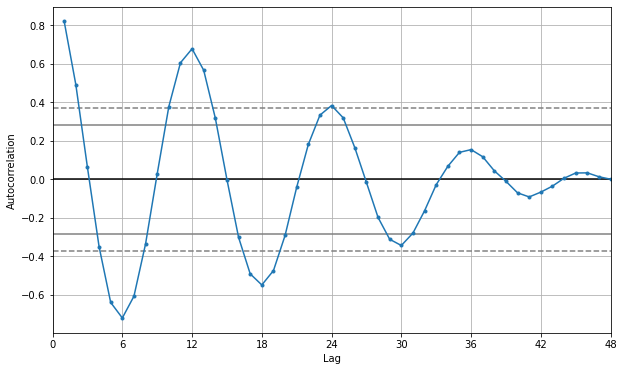

In [15]:
fig, ax = plt.subplots(figsize = (10, 6))

autocorrelation_plot(y, ax = ax, marker = '.')
ax.xaxis.set_major_locator(plt.MultipleLocator(6))
ax.set_xlim(0, 48)

plt.show()

In [26]:
# calculate a train-test split of a time series dataset
y = series.values
train_size = 36
y_train, y_test = y[0:train_size], y[train_size:len(y)]
print('Observations: %d' % (len(y)))
print('Training Observations: %d' % (len(y_train)))
print('Testing Observations: %d' % (len(y_test)))

Observations: 48
Training Observations: 36
Testing Observations: 12


In [27]:
series_train=series[0:train_size]
series_train.head()

Date
2007-01-01    4.22
2007-02-01    3.99
2007-03-01    4.05
2007-04-01    4.34
2007-05-01    4.63
Name: Value, dtype: float64

Date
2007-01-01         NaN
2007-02-01         NaN
2007-03-01         NaN
2007-04-01         NaN
2007-05-01         NaN
2007-06-01         NaN
2007-07-01         NaN
2007-08-01         NaN
2007-09-01         NaN
2007-10-01         NaN
2007-11-01         NaN
2007-12-01    4.568333
2008-01-01    4.557500
2008-02-01    4.561667
2008-03-01    4.550833
2008-04-01    4.545833
2008-05-01    4.531667
2008-06-01    4.537500
2008-07-01    4.521667
2008-08-01    4.510000
Name: Value, dtype: float64


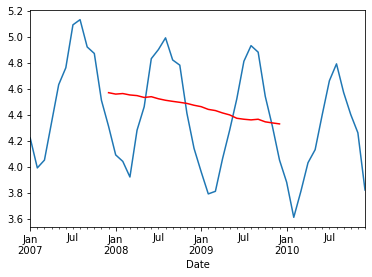

In [28]:
# moving average smoothing as data preparation
# tail-rolling average transform
rolling = series_train.rolling(window=12)
rolling_mean = rolling.mean()
print(rolling_mean.head(20))
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
plt.show()

In [29]:
X=y_train-rolling_mean
X.head(20)

Date
2007-01-01         NaN
2007-02-01         NaN
2007-03-01         NaN
2007-04-01         NaN
2007-05-01         NaN
2007-06-01         NaN
2007-07-01         NaN
2007-08-01         NaN
2007-09-01         NaN
2007-10-01         NaN
2007-11-01         NaN
2007-12-01   -0.258333
2008-01-01   -0.467500
2008-02-01   -0.521667
2008-03-01   -0.630833
2008-04-01   -0.265833
2008-05-01   -0.071667
2008-06-01    0.292500
2008-07-01    0.378333
2008-08-01    0.480000
Name: Value, dtype: float64

In [30]:
groups = X.groupby(Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
	years[name.year] = group.values
years['mean']=years.mean(axis=1)
years

,2007,2008,2009,mean
0,NaN,-0.467500,-0.500833,-0.484167
1,NaN,-0.521667,-0.650000,-0.585833
2,NaN,-0.630833,-0.620833,-0.625833
3,NaN,-0.265833,-0.352500,-0.309167
4,NaN,-0.071667,-0.117500,-0.094583
5,NaN,0.292500,0.148333,0.220417
6,NaN,0.378333,0.445833,0.412083
7,NaN,0.480000,0.570833,0.525417
8,NaN,0.318333,0.515833,0.417083
9,NaN,0.285833,0.195833,0.240833


In [31]:
k=years['mean'].mean()
k

-0.0520023148148149

In [32]:
years['S']=years['mean']-k
years

,2007,2008,2009,mean,S
0,NaN,-0.467500,-0.500833,-0.484167,-0.432164
1,NaN,-0.521667,-0.650000,-0.585833,-0.533831
2,NaN,-0.630833,-0.620833,-0.625833,-0.573831
3,NaN,-0.265833,-0.352500,-0.309167,-0.257164
4,NaN,-0.071667,-0.117500,-0.094583,-0.042581
5,NaN,0.292500,0.148333,0.220417,0.272419
6,NaN,0.378333,0.445833,0.412083,0.464086
7,NaN,0.480000,0.570833,0.525417,0.577419
8,NaN,0.318333,0.515833,0.417083,0.469086
9,NaN,0.285833,0.195833,0.240833,0.292836


In [33]:
s=years['S']
s

0    -0.432164
1    -0.533831
2    -0.573831
3    -0.257164
4    -0.042581
5     0.272419
6     0.464086
7     0.577419
8     0.469086
9     0.292836
10    0.001169
11   -0.237442
Name: S, dtype: float64

In [39]:
sez = pd.concat([s for i in range(3)], ignore_index = True)
sez.index = series_train.index
sez.head()

Date
2007-01-01   -0.432164
2007-02-01   -0.533831
2007-03-01   -0.573831
2007-04-01   -0.257164
2007-05-01   -0.042581
Name: S, dtype: float64

In [42]:
y_des=y_train-sez
y_des.head()

Date
2007-01-01    4.652164
2007-02-01    4.523831
2007-03-01    4.623831
2007-04-01    4.597164
2007-05-01    4.672581
Name: S, dtype: float64

In [44]:
t_train = np.arange(1, len(y_des) + 1)
t_train

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])

In [45]:
# Найдем коэффициенты уравнения тренда
coef = np.polyfit(t_train, y_des, deg = 1)
coef

array([-0.01000252,  4.64115774])

In [47]:
t_test = np.arange(len(y_train) + 1,len(y)+1)
t_test

array([37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [51]:
# Найдем расчетные значения на тестовом наборе по уравнению тренд-сезонной модели
y_pred = coef[0] * t_test + coef[1]+s
y_pred

0     3.838900
1     3.727231
2     3.677228
3     3.983893
4     4.188473
5     4.493471
6     4.675135
7     4.778466
8     4.660130
9     4.473877
10    4.172208
11    3.923595
Name: S, dtype: float64

In [52]:
R2 = r2_score(y_test, y_pred)
print('R2: %f' % R2)

R2: 0.948923


In [53]:
MSE = mean_squared_error(y_test, y_pred)
print('MSE: %f' % MSE)

MSE: 0.006644


In [56]:
#Базовая прогнозная модель: прогноз=предыдущее значение
y_pred=y[len(y_train)-1:len(y)-1]
y_pred

array([4.05, 3.88, 3.61, 3.81, 4.03, 4.13, 4.4 , 4.66, 4.79, 4.57, 4.4 ,
       4.26])

In [57]:
MSE = mean_squared_error(y_test, y_pred)
print('MSE: %f' % MSE)

MSE: 0.054008


Тренд-сезонная модель лучше базовой. Построим тренд-сезонную модель на всех данных и дадим прогноз на год вперед.

Date
2007-01-01         NaN
2007-02-01         NaN
2007-03-01         NaN
2007-04-01         NaN
2007-05-01         NaN
2007-06-01         NaN
2007-07-01         NaN
2007-08-01         NaN
2007-09-01         NaN
2007-10-01         NaN
2007-11-01         NaN
2007-12-01    4.568333
2008-01-01    4.557500
2008-02-01    4.561667
2008-03-01    4.550833
2008-04-01    4.545833
2008-05-01    4.531667
2008-06-01    4.537500
2008-07-01    4.521667
2008-08-01    4.510000
Name: Value, dtype: float64


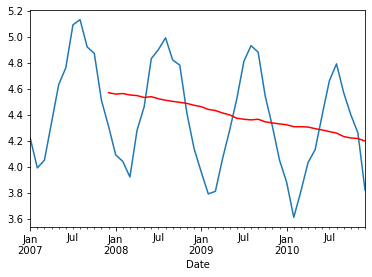

In [58]:
# moving average smoothing as data preparation
# tail-rolling average transform
rolling = series.rolling(window=12)
rolling_mean = rolling.mean()
print(rolling_mean.head(20))
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
plt.show()

In [59]:
X=y-rolling_mean
X.head(20)

Date
2007-01-01         NaN
2007-02-01         NaN
2007-03-01         NaN
2007-04-01         NaN
2007-05-01         NaN
2007-06-01         NaN
2007-07-01         NaN
2007-08-01         NaN
2007-09-01         NaN
2007-10-01         NaN
2007-11-01         NaN
2007-12-01   -0.258333
2008-01-01   -0.467500
2008-02-01   -0.521667
2008-03-01   -0.630833
2008-04-01   -0.265833
2008-05-01   -0.071667
2008-06-01    0.292500
2008-07-01    0.378333
2008-08-01    0.480000
Name: Value, dtype: float64

In [60]:
groups = X.groupby(Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
	years[name.year] = group.values
years['mean']=years.mean(axis=1)
years

,2007,2008,2009,2010,mean
0,NaN,-0.467500,-0.500833,-0.441667,-0.470000
1,NaN,-0.521667,-0.650000,-0.696667,-0.622778
2,NaN,-0.630833,-0.620833,-0.496667,-0.582778
3,NaN,-0.265833,-0.352500,-0.274167,-0.297500
4,NaN,-0.071667,-0.117500,-0.161667,-0.116944
5,NaN,0.292500,0.148333,0.118333,0.186389
6,NaN,0.378333,0.445833,0.390833,0.405000
7,NaN,0.480000,0.570833,0.532500,0.527778
8,NaN,0.318333,0.515833,0.338333,0.390833
9,NaN,0.285833,0.195833,0.180000,0.220556


In [61]:
k=years['mean'].mean()
k

-0.05748842592592588

In [62]:
years['S']=years['mean']-k
years

,2007,2008,2009,2010,mean,S
0,NaN,-0.467500,-0.500833,-0.441667,-0.470000,-0.412512
1,NaN,-0.521667,-0.650000,-0.696667,-0.622778,-0.565289
2,NaN,-0.630833,-0.620833,-0.496667,-0.582778,-0.525289
3,NaN,-0.265833,-0.352500,-0.274167,-0.297500,-0.240012
4,NaN,-0.071667,-0.117500,-0.161667,-0.116944,-0.059456
5,NaN,0.292500,0.148333,0.118333,0.186389,0.243877
6,NaN,0.378333,0.445833,0.390833,0.405000,0.462488
7,NaN,0.480000,0.570833,0.532500,0.527778,0.585266
8,NaN,0.318333,0.515833,0.338333,0.390833,0.448322
9,NaN,0.285833,0.195833,0.180000,0.220556,0.278044


In [63]:
s=years['S']
s

0    -0.412512
1    -0.565289
2    -0.525289
3    -0.240012
4    -0.059456
5     0.243877
6     0.462488
7     0.585266
8     0.448322
9     0.278044
10    0.038322
11   -0.253762
Name: S, dtype: float64

In [64]:
sez = pd.concat([s for i in range(4)], ignore_index = True)
sez.index = my_data.index
sez.head()

Date
2007-01-01   -0.412512
2007-02-01   -0.565289
2007-03-01   -0.525289
2007-04-01   -0.240012
2007-05-01   -0.059456
Name: S, dtype: float64

In [65]:
y_des=y-sez
y_des.head()

Date
2007-01-01    4.632512
2007-02-01    4.555289
2007-03-01    4.575289
2007-04-01    4.580012
2007-05-01    4.689456
Name: S, dtype: float64

In [66]:
t = np.arange(1, len(y_des) + 1)
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [67]:
# Найдем коэффициенты уравнения тренда
coef = np.polyfit(t, y_des, deg = 1)
coef

array([-0.0104758 ,  4.64790706])

In [68]:
# Найдем расчетные значения по уравнению тренд-сезонной модели
y_pred = coef[0] * t + coef[1]+sez
y_pred.head()

Date
2007-01-01    4.224920
2007-02-01    4.061666
2007-03-01    4.091190
2007-04-01    4.365992
2007-05-01    4.536072
Name: S, dtype: float64

In [69]:
R2 = r2_score(y, y_pred)
print('R2: %f' % R2)

R2: 0.980475


In [70]:
MAE = mean_absolute_error(y, y_pred)
print('MAE: %f' % MAE)

MAE: 0.046418


In [71]:
MSE = mean_squared_error(y, y_pred)
print('MSE: %f' % MSE)

MSE: 0.003098


In [72]:
# calculate root mean squared error
RMSE = sqrt(MSE)
print('RMSE: %f' % RMSE)

RMSE: 0.055660


In [73]:
my_data['Error']=y-y_pred
my_data.head()

,Value,Error
Date,,
2007-01-01,4.22,-0.004920
2007-02-01,3.99,-0.071666
2007-03-01,4.05,-0.041190
2007-04-01,4.34,-0.025992
2007-05-01,4.63,0.093928


<AxesSubplot:xlabel='Date'>

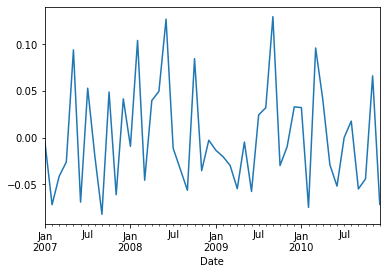

In [74]:
my_data.Error.plot()

In [75]:
my_data.Error.describe()

count    4.800000e+01
mean     4.625929e-17
std      5.624950e-02
min     -8.194664e-02
25%     -4.441842e-02
50%     -1.046560e-02
75%      4.007208e-02
max      1.294725e-01
Name: Error, dtype: float64

<AxesSubplot:>

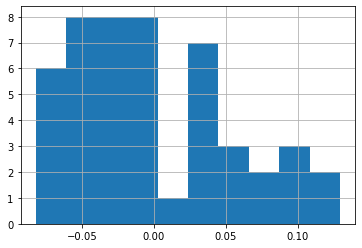

In [76]:
my_data.Error.hist()

<AxesSubplot:ylabel='Density'>

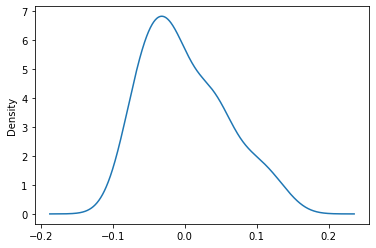

In [77]:
my_data.Error.plot(kind='kde')

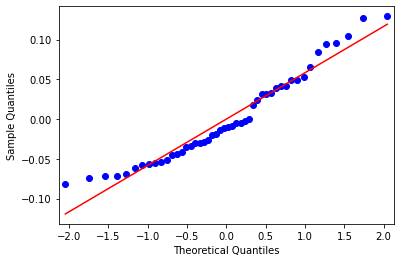

In [78]:
qqplot(my_data.Error, line='r')
plt.show()

In [79]:
d=durbin_watson(my_data.Error)
d

2.3863196370346578

In [80]:
4-d

1.6136803629653422

n=48, K=1, alfa=0.05. Тогда для n=50 и K=1 из таблицы на с.183 Дубровой dl=1.5, du=1.59

Так как 4-d>du, то гипотеза об отсутствии автокорреляции не отвергается.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

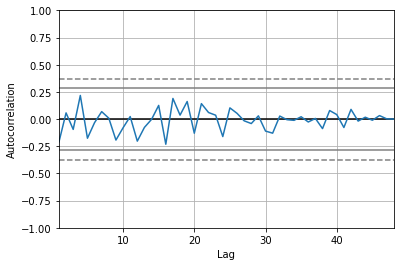

In [81]:
autocorrelation_plot(my_data.Error)

<p><a name="Intervals"></a></p>

# Построение интервального прогноза

$$\frac{\hat{Y_i}-Y_i}{\sigma} \sim T(n) $$ 
где $$\sigma^2 = \frac{\sum_{i=1}^{n}(Y_i-\hat{Y_i})^2}{n-1} $$
-выборочная дисперсия
$$ P(-T_{n,\alpha} < \frac{\hat{Y_i}-Y_i}{\sigma} < T_{n,\alpha} ) = \alpha $$
$$ \left (\hat{Y_i} -T_{n,\alpha}\cdot \sigma \leq Y_i \leq \hat{Y_i} +T_{n,\alpha}\cdot \sigma \right ) $$

In [82]:
sigma=scipy.stats.sem(y)
sigma

0.058103619380434325

In [83]:
confidence=0.95
tstu=scipy.stats.t.ppf((1 + confidence) / 2., len(y)-1)
tstu

2.0117405104757546

In [84]:
t_new = np.arange(len(y) + 1,len(y)+13)
t_new

array([49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

In [85]:
y_new=coef[0] * t_new + coef[1]+s
y_new

0     3.722081
1     3.558828
2     3.588352
3     3.863154
4     4.033234
5     4.326091
6     4.534227
7     4.646529
8     4.499108
9     4.318355
10    4.068157
11    3.765598
Name: S, dtype: float64

In [86]:
y_up=y_new+tstu*sigma
y_up

0     3.838971
1     3.675717
2     3.705241
3     3.980043
4     4.150123
5     4.442981
6     4.651116
7     4.763418
8     4.615998
9     4.435244
10    4.185046
11    3.882487
Name: S, dtype: float64

In [87]:
y_down=y_new-tstu*sigma
y_down

0     3.605192
1     3.441938
2     3.471463
3     3.746265
4     3.916344
5     4.209202
6     4.417337
7     4.529639
8     4.382219
9     4.201465
10    3.951267
11    3.648708
Name: S, dtype: float64

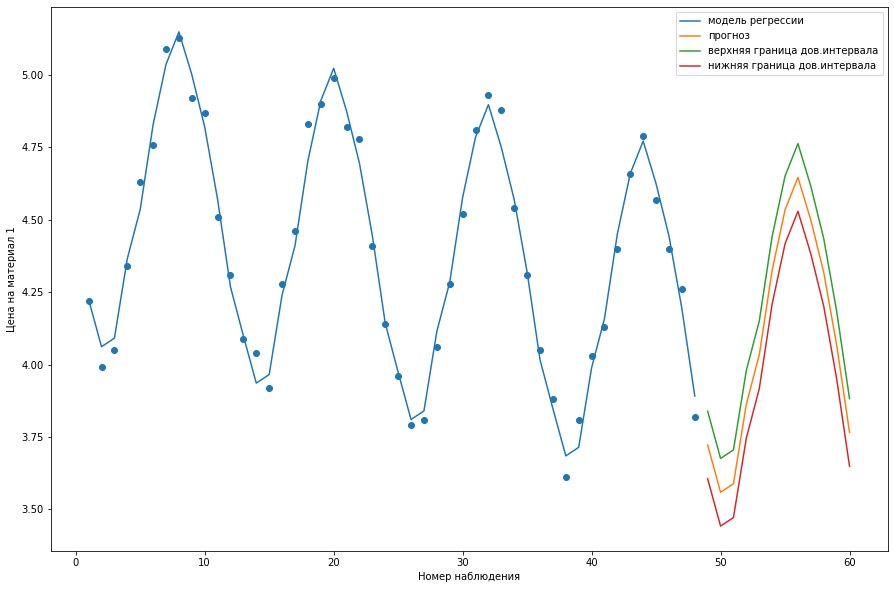

In [88]:
plt.figure(figsize=[15,10])

plt.scatter(t, y)

plt.plot(t,y_pred)
plt.plot(t_new,y_new)
plt.plot(t_new,y_up)
plt.plot(t_new,y_down)

plt.xlabel("Номер наблюдения")
plt.ylabel("Цена на материал 1")
plt.legend(['модель регрессии','прогноз','верхняя граница дов.интервала' ,\
            'нижняя граница дов.интервала'])

plt.show()

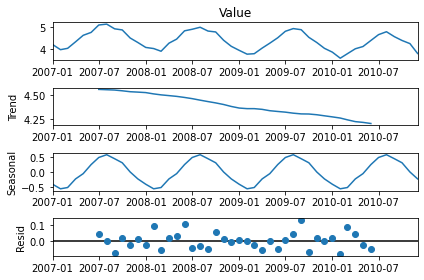

In [89]:
# additive decompose a contrived additive time series
result = seasonal_decompose(series, model='additive')
result.plot()
plt.show()

In [90]:
result.trend.head(10)

Date
2007-01-01         NaN
2007-02-01         NaN
2007-03-01         NaN
2007-04-01         NaN
2007-05-01         NaN
2007-06-01         NaN
2007-07-01    4.562917
2007-08-01    4.559583
2007-09-01    4.556250
2007-10-01    4.548333
Name: trend, dtype: float64

In [91]:
result.seasonal.head()

Date
2007-01-01   -0.414907
2007-02-01   -0.567546
2007-03-01   -0.524630
2007-04-01   -0.236574
2007-05-01   -0.059907
Name: seasonal, dtype: float64

In [92]:
result.resid.head(10)

Date
2007-01-01         NaN
2007-02-01         NaN
2007-03-01         NaN
2007-04-01         NaN
2007-05-01         NaN
2007-06-01         NaN
2007-07-01    0.045741
2007-08-01   -0.004259
2007-09-01   -0.076204
2007-10-01    0.017407
Name: resid, dtype: float64